# Capstone Machine Learning

OkCupid data

The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

## Load in Dataframe and import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time
import re

In [2]:
df = pd.read_csv('profiles.csv')

## Explore Data

In [3]:
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

In [4]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [5]:
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [6]:
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

## Data visualization

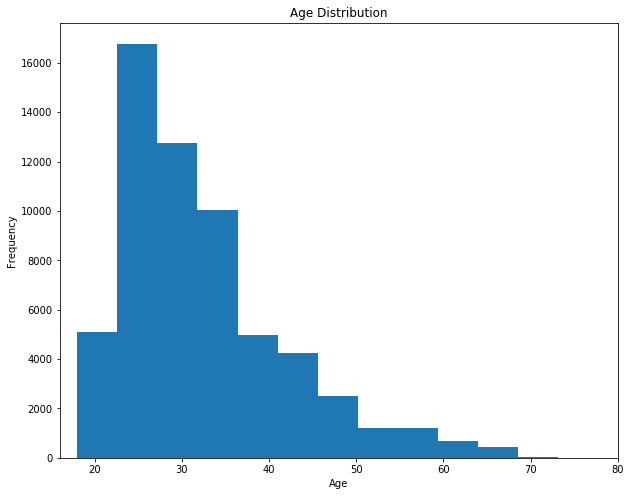

In [7]:
plt.figure(figsize=(10,8))
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.xlim(16, 80)
plt.savefig("Age_Distribution.png")
plt.show()

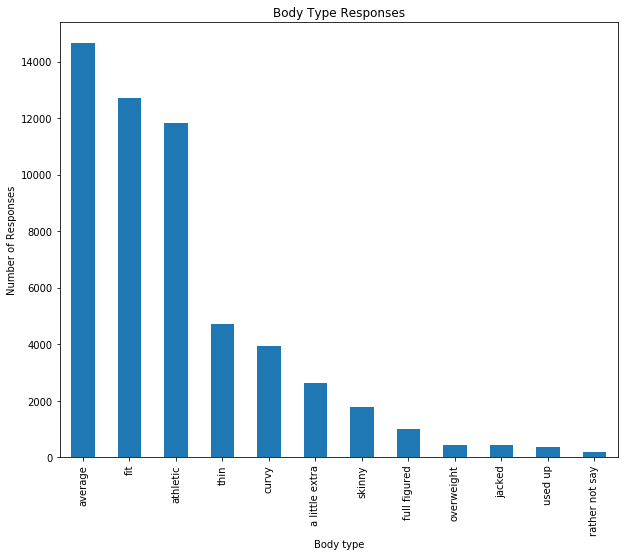

In [8]:
body_type = pd.value_counts(df.body_type.values, sort=True)

plt.figure(figsize=(10,8))
ax = body_type.plot(kind="bar", title="Body Type Responses")
ax.set(xlabel='Body type', ylabel='Number of Responses')
plt.savefig("Body_Type_Responses.png")
plt.show()

  sex  count
0   f  24117
1   m  35829


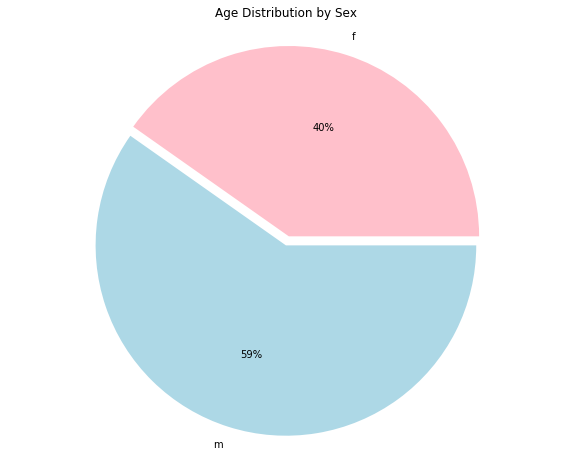

In [9]:
sex_df = df.groupby('sex').age.count().reset_index()
sex_df.rename(columns={'age':'count'}, inplace=True)
print(sex_df)

plt.figure(figsize=(10,8))
plt.pie(sex_df['count'], labels=sex_df['sex'], colors=['pink', '#ADD8E6'], autopct='%d%%', explode=[0,0.05])
plt.axis('equal')
plt.title('Age Distribution by Sex')
plt.savefig("Age_distribution_by_Sex.png")
plt.show()

In [10]:
df.corr()

,age,height,income
age,1.000000,-0.022262,-0.001004
height,-0.022262,1.000000,0.065049
income,-0.001004,0.065049,1.000000


## Augment dataset

In [11]:
columns_to_drop = ['ethnicity', 'sign', 'education', 'height', 'last_online', 'location', 'offspring', 'orientation','pets', 'religion', 'speaks']
df.drop(columns_to_drop, axis=1, inplace=True)
df.isna().any()

age          False
body_type     True
diet          True
drinks        True
drugs         True
essay0        True
essay1        True
essay2        True
essay3        True
essay4        True
essay5        True
essay6        True
essay7        True
essay8        True
essay9        True
income       False
job           True
sex          False
smokes        True
status       False
dtype: bool

In [12]:
columns_with_NaN = ['body_type', 'diet', 'smokes', 'drinks', 'drugs', 'job']
df.dropna(subset=columns_with_NaN, inplace=True)
df.fillna(value = {'essay0' : '', 'essay1' : '','essay2' : '','essay3' : '','essay4' : '','essay5' : '','essay6' : '','essay7' : '','essay8' : '','essay9' : ''}, inplace = True)
df.isna().any()

age          False
body_type    False
diet         False
drinks       False
drugs        False
essay0       False
essay1       False
essay2       False
essay3       False
essay4       False
essay5       False
essay6       False
essay7       False
essay8       False
essay9       False
income       False
job          False
sex          False
smokes       False
status       False
dtype: bool

In [13]:
# code the columns response of drinks, drugs and smokes into numbers and creating new columns
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)
smokes_mapping = {"no": 0, "trying to quit": 1, "when drinking": 2, "sometimes": 3, "yes": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)

In [14]:
# creating code column for body types
body_type_mapping = {'skinny': 0, 'athletic': 1, 'fit': 2,'thin': 3, 'average':4, 'curvy':5}

types_to_drop = ['full figured', 'a little extra', 'overweight', 'jacked', 'used up', 'rather not say']
df = df[~df['body_type'].isin(types_to_drop)]

df["body_type_code"] = df.body_type.map(body_type_mapping)
set(df.body_type.values)


{'athletic', 'average', 'curvy', 'fit', 'skinny', 'thin'}

In [15]:

essay_cols = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]
# Removing NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda word: ''.join(filter(lambda x: x not in '".,;!-', word)), axis=1)
df["essay_len"] = all_essays.apply(lambda x: len(x))
df["word_count"] = all_essays.str.count(' ') + 1
df["avg_word_len"] = df['essay_len'] / df['word_count']
df["Count_I_and_Me"] = all_essays.str.count('\s[iI]\s|\s[mM]e\s')

print(df['avg_word_len'].head())
print(df['Count_I_and_Me'].head())

1     5.752988
7     7.941935
9     6.412234
11    6.047120
13    0.000000
Name: avg_word_len, dtype: float64
1     18
7      1
9     26
11    31
13     0
Name: Count_I_and_Me, dtype: int64


In [16]:
sex_mapping = {'m': 0, 'f': 1}
df['sex_code'] = df.sex.map(sex_mapping)

## Questions 

## Can we predict age using lifestyle (drinks, smokes, drugs), body type and the way they write an essay? 

In [17]:
feature_data = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_len', 'body_type_code']]

x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

age = df['age']

In [18]:
# creating the train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, age, test_size=0.2, random_state=1)

In [19]:
X_train.shape

(16760, 6)

#### Using multiple linear regressions 

Multiple linear regression training score: 0.04878089359157001
Multiple linear regression test score: 0.04922815961011218


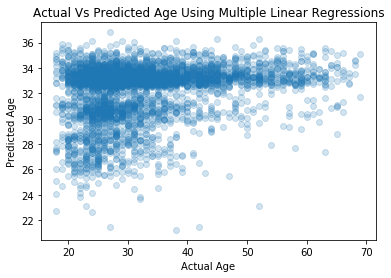

In [20]:
from sklearn.linear_model import LinearRegression

multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
multiple_training_score = multiple_model.score(X_train, y_train)

print('Multiple linear regression training score: {}'.format(multiple_training_score))

multiple_test_score = multiple_model.score(X_test, y_test)

print('Multiple linear regression test score: {}'.format(multiple_test_score))

multiple_predict = multiple_model.predict(X_test)
plt.scatter(y_test, multiple_predict, alpha=0.2)
plt.title('Actual Vs Predicted Age Using Multiple Linear Regressions')
plt.xlabel('Actual Age')
plt.ylabel("Predicted Age")
plt.savefig("Actual_Vs_Predicted_Age_LR.png")
plt.show()


#### K neighbor Regression

K-Neighbors Regression training score: 0.9725693098185818
K-Neighbors Regression test score: 0.029479428428743293


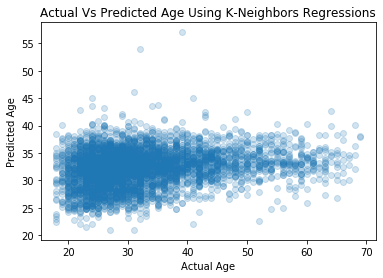

In [21]:
from sklearn.neighbors import KNeighborsRegressor

KN_model = KNeighborsRegressor(n_neighbors=50, weights='distance')
KN_model.fit(X_train, y_train)
KN_model_training_score = KN_model.score(X_train, y_train)

print('K-Neighbors Regression training score: {}'.format(KN_model_training_score))

KN_model_test_score = KN_model.score(X_test, y_test)

print('K-Neighbors Regression test score: {}'.format(KN_model_test_score))

KN_model_predict = KN_model.predict(X_test)
plt.scatter(y_test, KN_model_predict, alpha=0.2)
plt.title('Actual Vs Predicted Age Using K-Neighbors Regressions')
plt.xlabel('Actual Age')
plt.ylabel("Predicted Age")
plt.savefig("Actual_Vs_Predicted_Age_KNR.png")
plt.show()

## Can we predict body type using age and lifestyle (Drinks, Smokes, Drugs use)? 

In [22]:
feature_data_2 = df[['smokes_code', 'drinks_code', 'drugs_code', 'age']]

x = feature_data_2.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data_2 = pd.DataFrame(x_scaled, columns=feature_data_2.columns)

labels = df['body_type_code']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(feature_data_2, labels, test_size=0.2, random_state=10)

### Using K-Neighbor Classifier 

In [24]:
from sklearn.neighbors import KNeighborsClassifier

KN_classifier = KNeighborsClassifier(n_neighbors=80)
KN_classifier.fit(X_train, y_train)

KNC_training_score = KN_classifier.score(X_train, y_train)
 
print("K-Neighbor Classifier training set score: {}".format(KNC_training_score))

KNC_test_score = KN_classifier.score(X_test, y_test)

print("K-Neighbor Classifier test set score: {}".format(KNC_test_score))

K-Neighbor Classifier training set score: 0.31515513126491645
K-Neighbor Classifier test set score: 0.29945120496301597


In [25]:
from sklearn.metrics import classification_report, confusion_matrix 

KNC_predictions = KN_classifier.predict(X_test)
print(confusion_matrix(y_test, KNC_predictions))
print(classification_report(y_test, KNC_predictions))

[[  0  11  48   1  86   0]
 [  0 145 347   1 502   0]
 [  0 168 388   0 517   0]
 [  0  53 127   2 203   0]
 [  0 165 390   2 720   0]
 [  0  42  89   1 183   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.25      0.15      0.18       995
           2       0.28      0.36      0.32      1073
           3       0.29      0.01      0.01       385
           4       0.33      0.56      0.41      1277
           5       0.00      0.00      0.00       315

    accuracy                           0.30      4191
   macro avg       0.19      0.18      0.15      4191
weighted avg       0.26      0.30      0.25      4191



/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


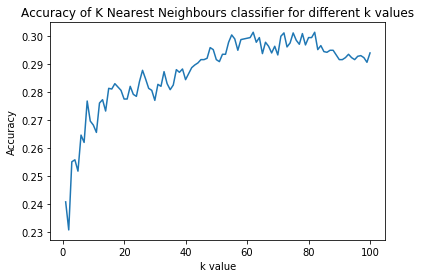

{'k': 62, 'score': 0.3013600572655691}


In [26]:
scores = []
highest_score = {'k': 0, 'score': 0}

for k in range(1, 101):
    KN_classifier = KNeighborsClassifier(n_neighbors=k)
    KN_classifier.fit(X_train, y_train)
    score = KN_classifier.score(X_test, y_test)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'k': k,
            'score': score
        }

x_values = range(1, 101)
y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of K Nearest Neighbours classifier for different k values')
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.savefig('Accuracy_of_KNearest_Neighbours_classifier_for_different_k_values.png')
plt.show()
print(highest_score)

### Using Support Vector Machines Classification

In [27]:
from sklearn.svm import SVC

svc_classifier = SVC(gamma=10)
svc_classifier.fit(X_train, y_train)

SVC_training_score = svc_classifier.score(X_train, y_train)

print("SVC training set score: {}".format(SVC_training_score))

SVC_test_score = svc_classifier.score(X_test, y_test)

print("SVC test set score: {}".format(SVC_test_score))

SVC training set score: 0.3093675417661098
SVC test set score: 0.3123359580052493


In [28]:
# generate classification report and confusion matrix for Support Vector Machines classifier

svc_predictions = svc_classifier.predict(X_test)
print(confusion_matrix(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))

[[  0   5  20   0 121   0]
 [  0  27 320   0 648   0]
 [  0  35 401   0 637   0]
 [  0  11 105   1 268   0]
 [  0  32 365   0 880   0]
 [  0   7  84   0 224   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.23      0.03      0.05       995
           2       0.31      0.37      0.34      1073
           3       1.00      0.00      0.01       385
           4       0.32      0.69      0.43      1277
           5       0.00      0.00      0.00       315

    accuracy                           0.31      4191
   macro avg       0.31      0.18      0.14      4191
weighted avg       0.32      0.31      0.23      4191



/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


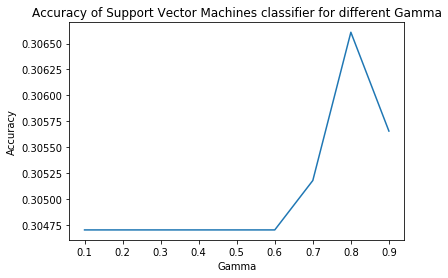

{'gamma': 0.8, 'score': 0.30660940109759005}


In [29]:
# plot using different gammas

scores = []
highest_score = {
    'gamma': 0,
    'score': 0
}

gamma_values = np.arange(0.1, 1.0, 0.1)

for gamma in gamma_values:
    svc_classifier = SVC(gamma=gamma)
    svc_classifier.fit(X_train, y_train)
    score = svc_classifier.score(X_test, y_test)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'gamma': gamma,
            'score': score
        }

x_values = gamma_values

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of Support Vector Machines classifier for different Gamma')
plt.ylabel('Accuracy')
plt.xlabel('Gamma')
plt.savefig('Accuracy_of_Support_Vector_Machine_classifier_for_different_Gamma.png')
plt.show()
print(highest_score)

## Can we predict sex using lenght, word count and use of "I" and "Me" of an essay? 

In [30]:
feature_data_3 = df[['essay_len', 'avg_word_len', 'Count_I_and_Me']]

x = feature_data_3.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data_3 = pd.DataFrame(x_scaled, columns=feature_data_3.columns)

sex = df['sex_code']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(feature_data_3, sex, test_size=0.2, random_state=1)

In [32]:
from sklearn.linear_model import LinearRegression

multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
training_score = multiple_model.score(X_train, y_train)

print('Multiple linear regression training score: {}'.format(training_score))

test_score = multiple_model.score(X_test, y_test)

print('Multiple linear regression test score: {}'.format(test_score))


Multiple linear regression training score: 0.006291225000840006
Multiple linear regression test score: 0.009052285331605625
